<a href="https://colab.research.google.com/github/kaitlinblakeslee/DS2002F24/blob/main/APIhw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import json
import pandas as pd
import requests

In [42]:
api_key = '' #removed key for public repo

ticker = input() #enter stock ticker symbol

AAPL


In [43]:
#get end point

url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={ticker}&apikey={api_key}"
response = requests.get(url)
data = response.json()

In [44]:
# Does the data exist? This is a potential way to check for erros/handle odd cases (question 4 on hw)
if "Global Quote" not in data:
    print(f"No data found for ticker symbol {ticker}.")
else:
    stock_info = data["Global Quote"]

# Display stock information
# Ticker name
# Full Name of Stock
# Current market price

print(f"\nStock Information for ticker {ticker}:")
print(f"Full name of stock: {ticker}")
print(f"Current Market Price: ${stock_info['05. price']}")


Stock Information for ticker AAPL:
Full name of stock: AAPL
Current Market Price: $227.7900


In [56]:
# Target Mean Price
# 52 week high and 52 week low

apikey = "" #removed key for public repo
stock_list = ["AAPL", "GOOGL", "MSFT"]  # Example stock symbols
url = "https://yfapi.net/v6/finance/quote"

# Prepare the query parameters
querystring = {
    "symbols": ",".join(stock_list)
}

# Set the headers, including your API key
headers = {
    'x-api-key': apikey
}

# Make the request to the API
response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    stock_data = response.json()
    print("Stock Data Response:")
    print(stock_data)  # Print the entire response for debugging

    # Data for each stock
    stocks_info = []
    for stock in stock_data['quoteResponse']['result']:
        symbol = stock.get("symbol", "N/A")
        target_mean_price = stock.get("targetMeanPrice", "N/A") # for some reason I can't seem to find targetMeanPrice either which is weird because I found it in yahoo finance and know it exists
        week_52_high = stock.get("fiftyTwoWeekHigh", "N/A")
        week_52_low = stock.get("fiftyTwoWeekLow", "N/A")

        stocks_info.append({
            "Ticker": symbol,
            "Target Mean Price": target_mean_price,
            "52 Week High": week_52_high,
            "52 Week Low": week_52_low
        })

# making the information into a data frame
stocks_df = pd.DataFrame(stocks_info)

# Display the DataFrame
print("\nStock Information:")
print(stocks_df)

Stock Data Response:
{'quoteResponse': {'result': [{'language': 'en-US', 'region': 'US', 'quoteType': 'EQUITY', 'typeDisp': 'Equity', 'quoteSourceName': 'Nasdaq Real Time Price', 'triggerable': True, 'customPriceAlertConfidence': 'HIGH', 'currency': 'USD', 'hasPrePostMarketData': True, 'firstTradeDateMilliseconds': 345479400000, 'priceHint': 2, 'postMarketChangePercent': -0.127307, 'postMarketTime': 1727481596, 'postMarketPrice': 227.5, 'postMarketChange': -0.289993, 'regularMarketChange': 0.20500183, 'regularMarketTime': 1727467204, 'regularMarketDayHigh': 229.52, 'regularMarketDayRange': '227.3 - 229.52', 'regularMarketDayLow': 227.3, 'regularMarketVolume': 34025967, 'regularMarketPreviousClose': 227.52, 'bid': 227.59, 'ask': 240.09, 'bidSize': 5, 'askSize': 1, 'fullExchangeName': 'NasdaqGS', 'financialCurrency': 'USD', 'regularMarketOpen': 228.43, 'averageDailyVolume3Month': 54814806, 'averageDailyVolume10Day': 76087390, 'fiftyTwoWeekLowChange': 63.645004, 'fiftyTwoWeekLowChangePerc

In [32]:
# 5 of the current trending stock - hardcoded version - tried to make a call in code shown below but keep getting error 403 message

trending_stock_tickers = ["AMSC", "PWR", "VRT", "SNAP", "BBD"]

In [36]:
# DataFrame to display trending stocks
trending_data = []
for symbol in trending_stock_tickers:
    trending_url = f"https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={symbol}&apikey={api_key}"
    trending_response = requests.get(trending_url)
    trending_stock_info = trending_response.json().get("Global Quote", {})

    trending_data.append({
        "Ticker": symbol,
        "Price": trending_stock_info.get("05. price", "N/A"),
        "Change": trending_stock_info.get("09. change", "N/A"),
        "Change Percent": trending_stock_info.get("10. change percent", "N/A")
    })

# Convert into pandas data frame
trending_df = pd.DataFrame(trending_data)
print("\nTrending Stocks:")
print(trending_df)

# DataFrame to a CSV file
csv_file = "trending_stocks.csv"
trending_df.to_csv(csv_file, index=False)

#print(f"\nTrending stocks saved to {csv_file}.")


Trending Stocks:
  Ticker     Price   Change Change Percent
0   AMSC   22.9800   0.9200        4.1704%
1    PWR  296.7400   0.3800        0.1282%
2    VRT   98.4100  -2.2100       -2.1964%
3   SNAP   10.8700   0.3100        2.9356%
4    BBD    2.7100   0.0400        1.4981%


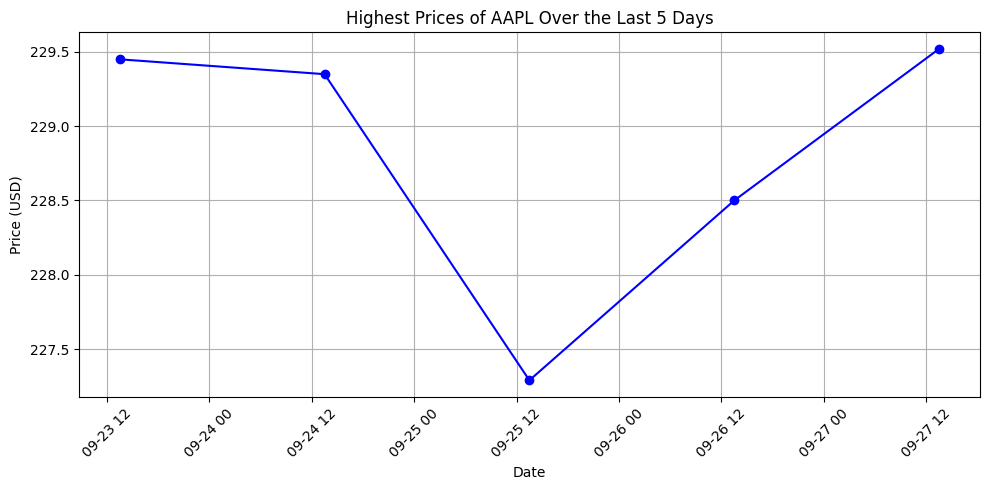

In [60]:
# BONUS - Use MatPlotLib to chart the historical price of a stock price’s highest value over the past 5 days

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

apikey = "" #removed key for public repo
ticker = "AAPL"  # Example stock (apple)

# Get today's date and the date 5 days ago
end_date = datetime.now()
start_date = end_date - timedelta(days=5)

#convert dates to strings
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Define the URL for historical price data
url = f"https://yfapi.net/v8/finance/chart/{ticker}"

params = {
    'range': '5d',
    'interval': '1d',
    'region': 'US',
    'lang': 'en-US',
    'includePrePost': 'false',
    'events': 'div|split|earn',
    'apikey': apikey
}

# historical stock data
response = requests.get(url, params=params, headers={'X-API-KEY': apikey})

if response.status_code == 200:
    data = response.json()
    timestamps = data['chart']['result'][0]['timestamp']
    high_prices = data['chart']['result'][0]['indicators']['quote'][0]['high']

# Plotting the highest prices over the last 5 days
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['High Price'], marker='o', linestyle='-', color='b')
plt.title(f'Highest Prices of {ticker} Over the Last 5 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
# 5 trending stocks - unable to call/find them

urltrends = "https://yfapi.net/v1/finance/trending/US"

headers = {
    "api_key": api_key,
    "Content-Type": "application/json"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()

# List of trending stocks
trending_stocks = data.get("finance", {}).get("result", [{}])[0].get("quotes", [])

# Are there trending stocks available?? Again looking at possible ways to handle errors
if not trending_stocks:
  print("No trending stocks found.")
else:
  # Collect relevant data for the top 5 trending stocks
  stock_data = []
  for stock in trending_stocks[:5]:  # Only get the top 5 trending stocks
    symbol = stock.get("symbol", "N/A")
    name = stock.get("shortName", "N/A")
    stock_data.append({
      "Ticker": symbol,
      "Name": name
       })


No trending stocks found.


In [61]:

#trending stocks - but getting an error - is it because too many requests or something wrong with my API key?

apikey = "" #removed key for public repo
url = "https://yfapi.net/v1/finance/trending/US"

# Specify the headers with your API key
headers = {
    "apikey": apikey,
    "Content-Type": "application/json"
}

# Fetch trending stocks
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("Full API Response:")
    print(data)  # Print the entire response for debugging

    # Extract the list of trending stocks
    trending_stocks = data.get("finance", {}).get("result", [{}])[0].get("quotes", [])

    # Check if there are trending stocks available
    if not trending_stocks:
        print("No trending stocks found.")
    else:
        # Collect relevant data for the top 5 trending stocks
        stock_data = []
        for stock in trending_stocks[:5]:  # Only get the top 5 trending stocks
            symbol = stock.get("symbol", "N/A")
            name = stock.get("shortName", "N/A")
            stock_data.append({
                "Ticker": symbol,
                "Name": name
            })

        # Create a pandas DataFrame for the top 5 trending stocks
        trending_df = pd.DataFrame(stock_data)

        # Display the top 5 trending stocks
        print("\nTop 5 Trending Stocks:")
        print(trending_df)

        # Convert the DataFrame to a CSV file
        csv_file_name = "top_5_trending_stocks.csv"
        trending_df.to_csv(csv_file_name, index=False)
        print(f"\nTop 5 trending stocks saved to {csv_file_name}.")
else:
    print(f"Failed to fetch trending stocks. HTTP Status Code: {response.status_code}")

Failed to fetch trending stocks. HTTP Status Code: 403
